# $\textit{Analisis de respuestas impulsivas}$
$\textit{Filtro lineal optimo}$

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd
import scipy.signal as sp
import scipy.io as io

In [27]:
%matplotlib widget

In [28]:
fs = 48000

In [29]:
t = np.linspace(0, 10, 10*fs, endpoint=False)
f0 = 20
f1 = 20000
T = 10
k = (f1/f0)**(1/T)

chirpLinearSignal = sp.chirp(t, f0=f0, t1=10, f1=f1, method='linear')

chirpExpSignal = np.sin(2 * np.pi * f0 * (k**t-1)/np.log(k))

gaussSignal = np.random.normal(0, 1, size=fs*10)

squareSignal = sp.square(2 * np.pi * 100 * t)



In [30]:
# io.wavfile.write("chirpLinearSignal.wav", fs, chirpLinearSignal)
# io.wavfile.write("chirpExpSignal.wav", fs, chirpExpSignal)
# io.wavfile.write("noiseSignal.wav", fs, gaussSignal)
# io.wavfile.write("squareSignal.wav", fs, squareSignal)

In [31]:
def plot_spectrogram(title, w, fs):
    ff, tt, Sxx = sp.spectrogram(w, fs=fs, nperseg=256, nfft=576)
    fig, ax = plt.subplots()
    ax.pcolormesh(tt, ff, Sxx, cmap='gray_r',
                  shading='gouraud')
    ax.set_title(title)
    ax.set_xlabel('t (sec)')
    ax.set_ylabel('Frequency (Hz)')
    ax.grid(True)


In [32]:
fs1, musicSignal = io.wavfile.read("musicSignal.wav")
fs2, VoiceSignal = io.wavfile.read("VoiceSignal.wav")
fs3, chirpLinearSignal = io.wavfile.read("chirpLinearSignal.wav")
fs4, chirpExpSignal = io.wavfile.read("chirpExpSignal.wav")
fs5, gaussSignal = io.wavfile.read("noiseSignal.wav")
fs6, squareSignal = io.wavfile.read("squareSignal.wav")

In [33]:
signal = {"music": musicSignal, "voice": VoiceSignal, "chirpLin": chirpLinearSignal,
          "chirpExp": chirpExpSignal, "gauss": gaussSignal, "square": squareSignal}

In [34]:
ipd.Audio(squareSignal, rate=fs)

Comparamos los espectros de potencia

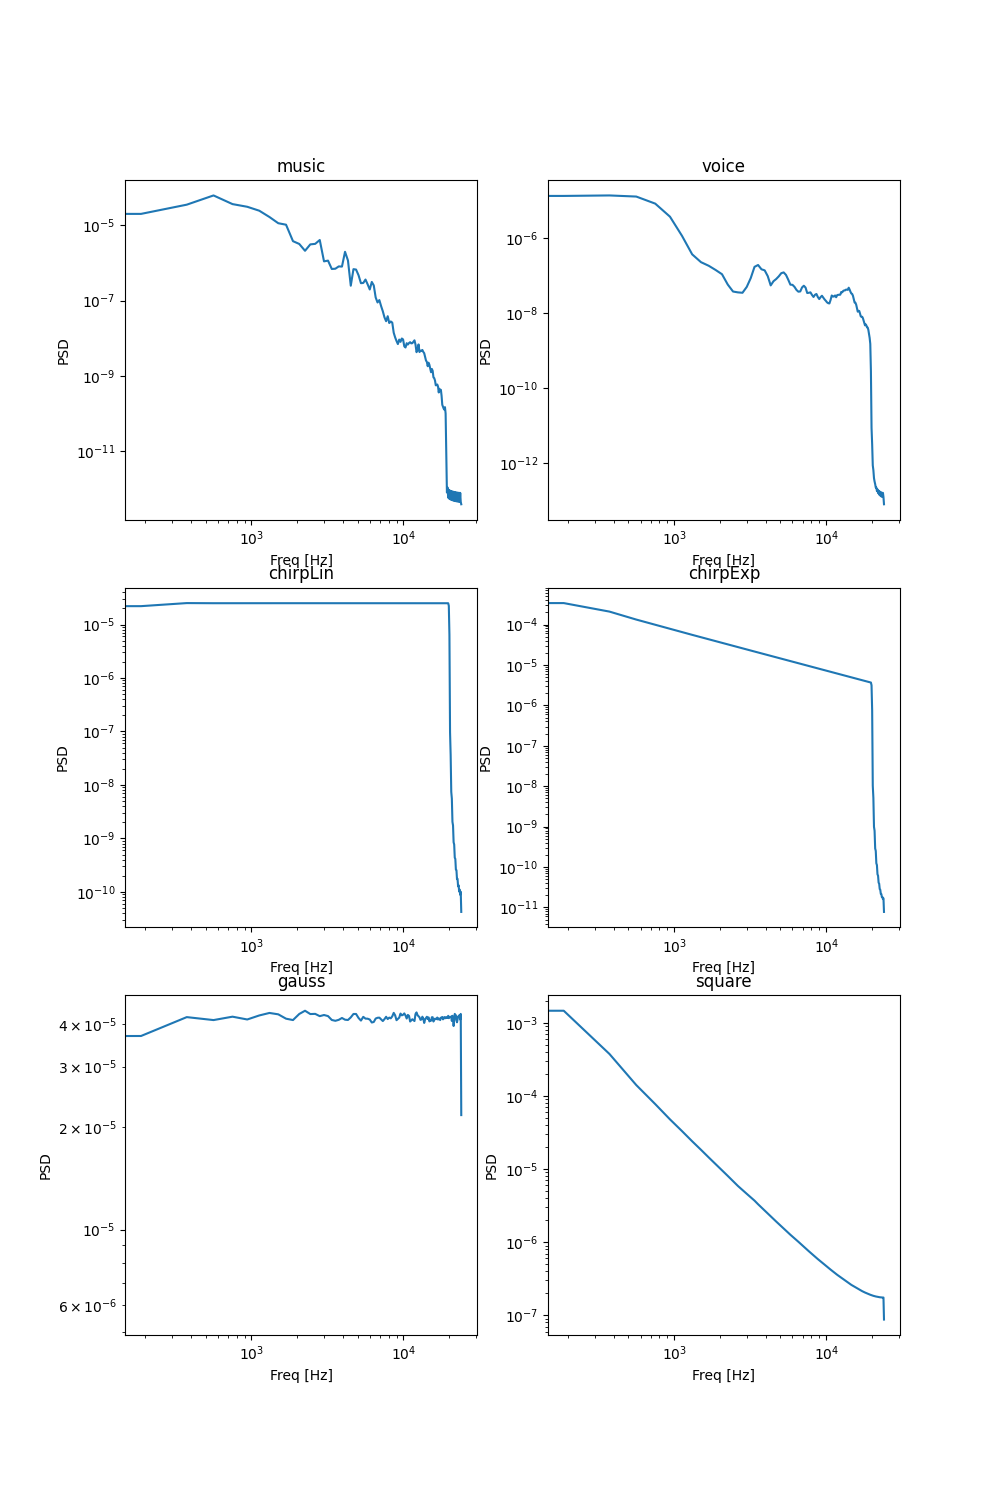

In [41]:
plt.figure(figsize=(10, 15))

for i, (name, s) in enumerate(zip(signal.keys(), signal.values())):
    f, Pxx_den = sp.welch(s, fs=fs, window='bartlett')
    plt.subplot(3, 2, i+1)
    plt.title(f"{name}")
    plt.xlabel('Freq [Hz]')
    plt.ylabel('PSD')
    plt.loglog(f, Pxx_den)

Viendo los espectrogramas anteriores, intuimos que la señal que mejor va funcionar para obtener h(n) es el barrido lineal porque excita al sistema (en este caso en el living de una casa) con un espectro de potencia mas constante que los demas. Este espectro plano permite que el resultado del filtro optimo ajuste directamente sobre el sistema q se quiere modelar y no tambien tome las caracteris

# Modelado de sistema

In [42]:
R = sp.correlate(chirpLinearSignal, chirpLinearSignal) 